# Reading a Buffer

This jupyter notebook reads a buffer an plots all it's attributes over the event numbers. You can use whichever buffer you want by simply selecting a data file and tweaking the appropriate parameters on the setup block below

In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import to_hex
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import os

import raadpy as rp

# Define some constants
raw_dir = '../../Data/RAW/'

# Print the tree of the raw data directory
for root, dirs, files in os.walk(raw_dir):
    level = root.replace(raw_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))

%matplotlib widget

/
    .DS_Store
SD-980/
    light1-SD-980-buff4.dat
    light1-SD-980-buff5.dat
    light1-SD-980-buff7.dat
    light1-SD-980-se-log.txt
    light1-SD-980-buff6.dat
    light1-SD-980-buff1.dat
SD-915/
    Light1_2022-05-20_Buff4.dat
    Light1_2022-05-20_Buff5.dat
    Light1_2022-05-20_Buff7.dat
    Light1_2022-05-20_Buff6.dat
    Light1_2022-05-20_Buff1.dat
    dat.csv
    VetoDecoder
    Light1-OperationalTest_May23_ScriptLog.txt
    OperatingScript20May23May.txt
    test.txt
    Light1_2022-05-20_Buff8.dat
SD-971/
    light1-SD-971-se-log.txt
    light1-SD-971-buff6.dat
    light1-SD-971-buff7.dat
    light1-SD-971-buff5.dat
    light1-SD-971-buff4.dat
    light1-SD-971-buff1.dat
SD-922/
    sd922-buff6.dat
    sd922-buff7.dat
    sd922-buff5.dat
    sd922-buff4.dat
    sd922-buff1.dat
    sd922-script-log.txt
SD-892/
    .DS_Store
    NonVetoSiPM_Light1_2022-05-11_Buff4.dat
    Light1_2022-05-11_Buff8.dat
    Light1_2022-05-11_Buff5.dat
    Light1_2022-05-11_Buff6.dat
    ORBIT_Lig

# Orbit Buffer Data

First we collect the data from the orbit buffer, then we split based on the detector id and then plot

In [2]:
# Directory of the buffer
buffer_fname    = raw_dir + 'SD-1015/' + 'light1-SD-1015-buff1.dat'

# Decode the buffer data in a dictionary
data_SiPM   = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 0")
data_PMT    = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 1")

Line:   0%|          | 0/392 [00:00<?, ?it/s]

Line:   0%|          | 0/392 [00:00<?, ?it/s]

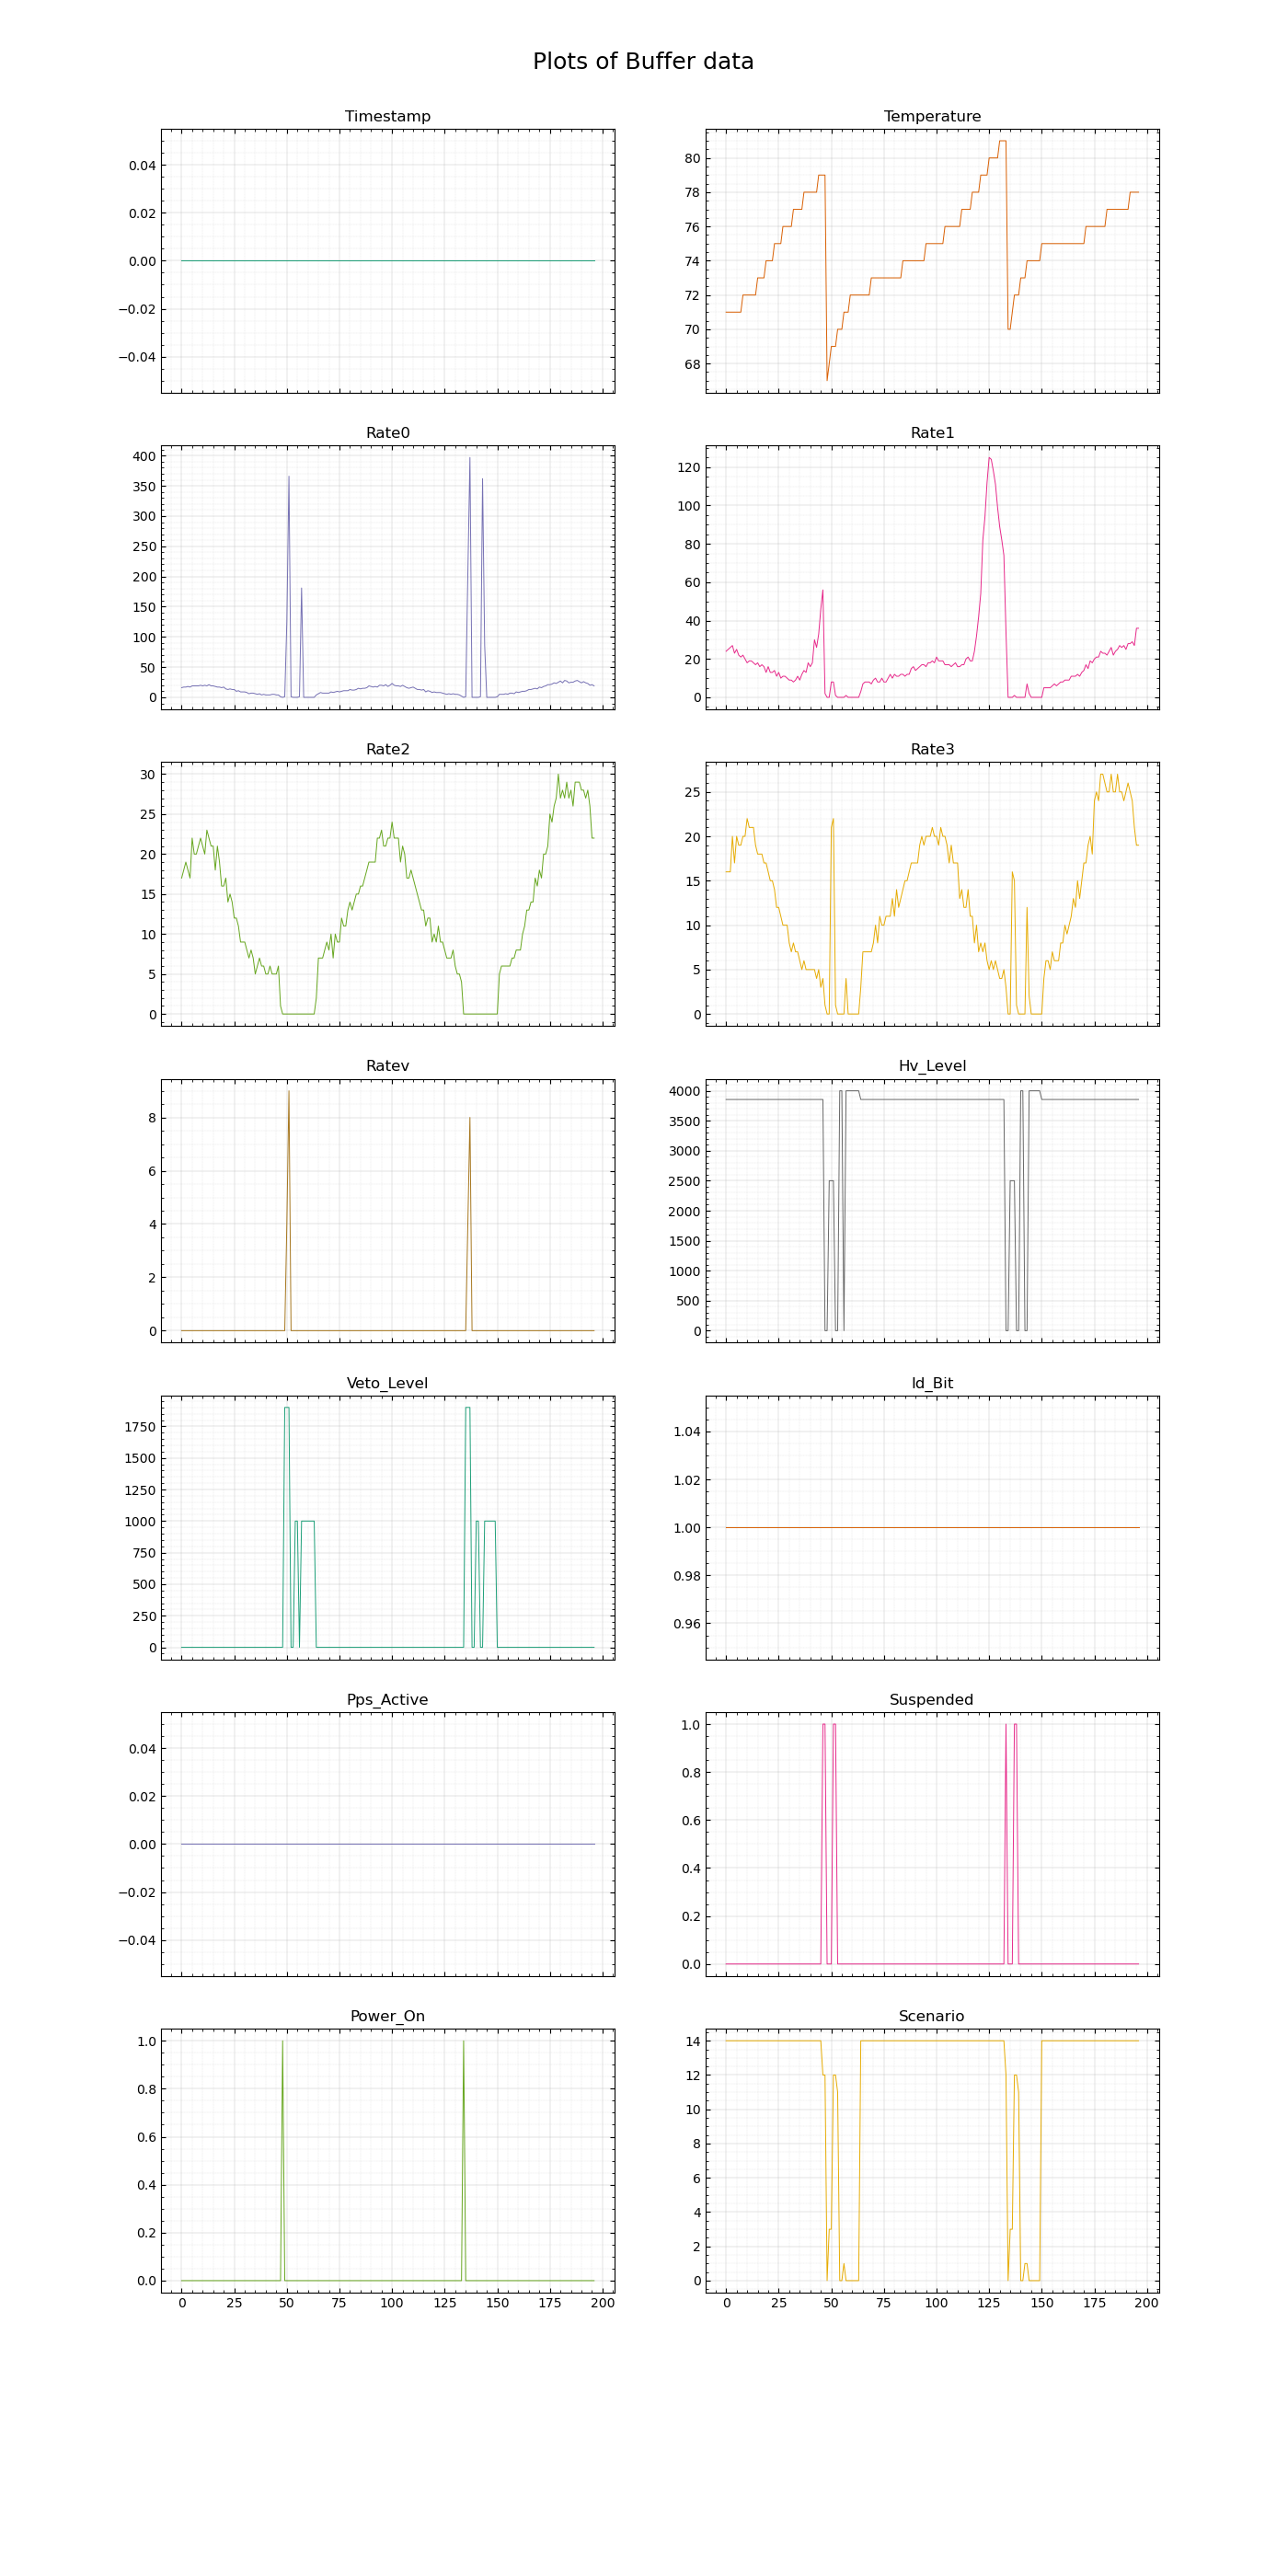

In [3]:
# Now print the PMT Data
fig, axes = rp.plot_buffer(data_PMT)

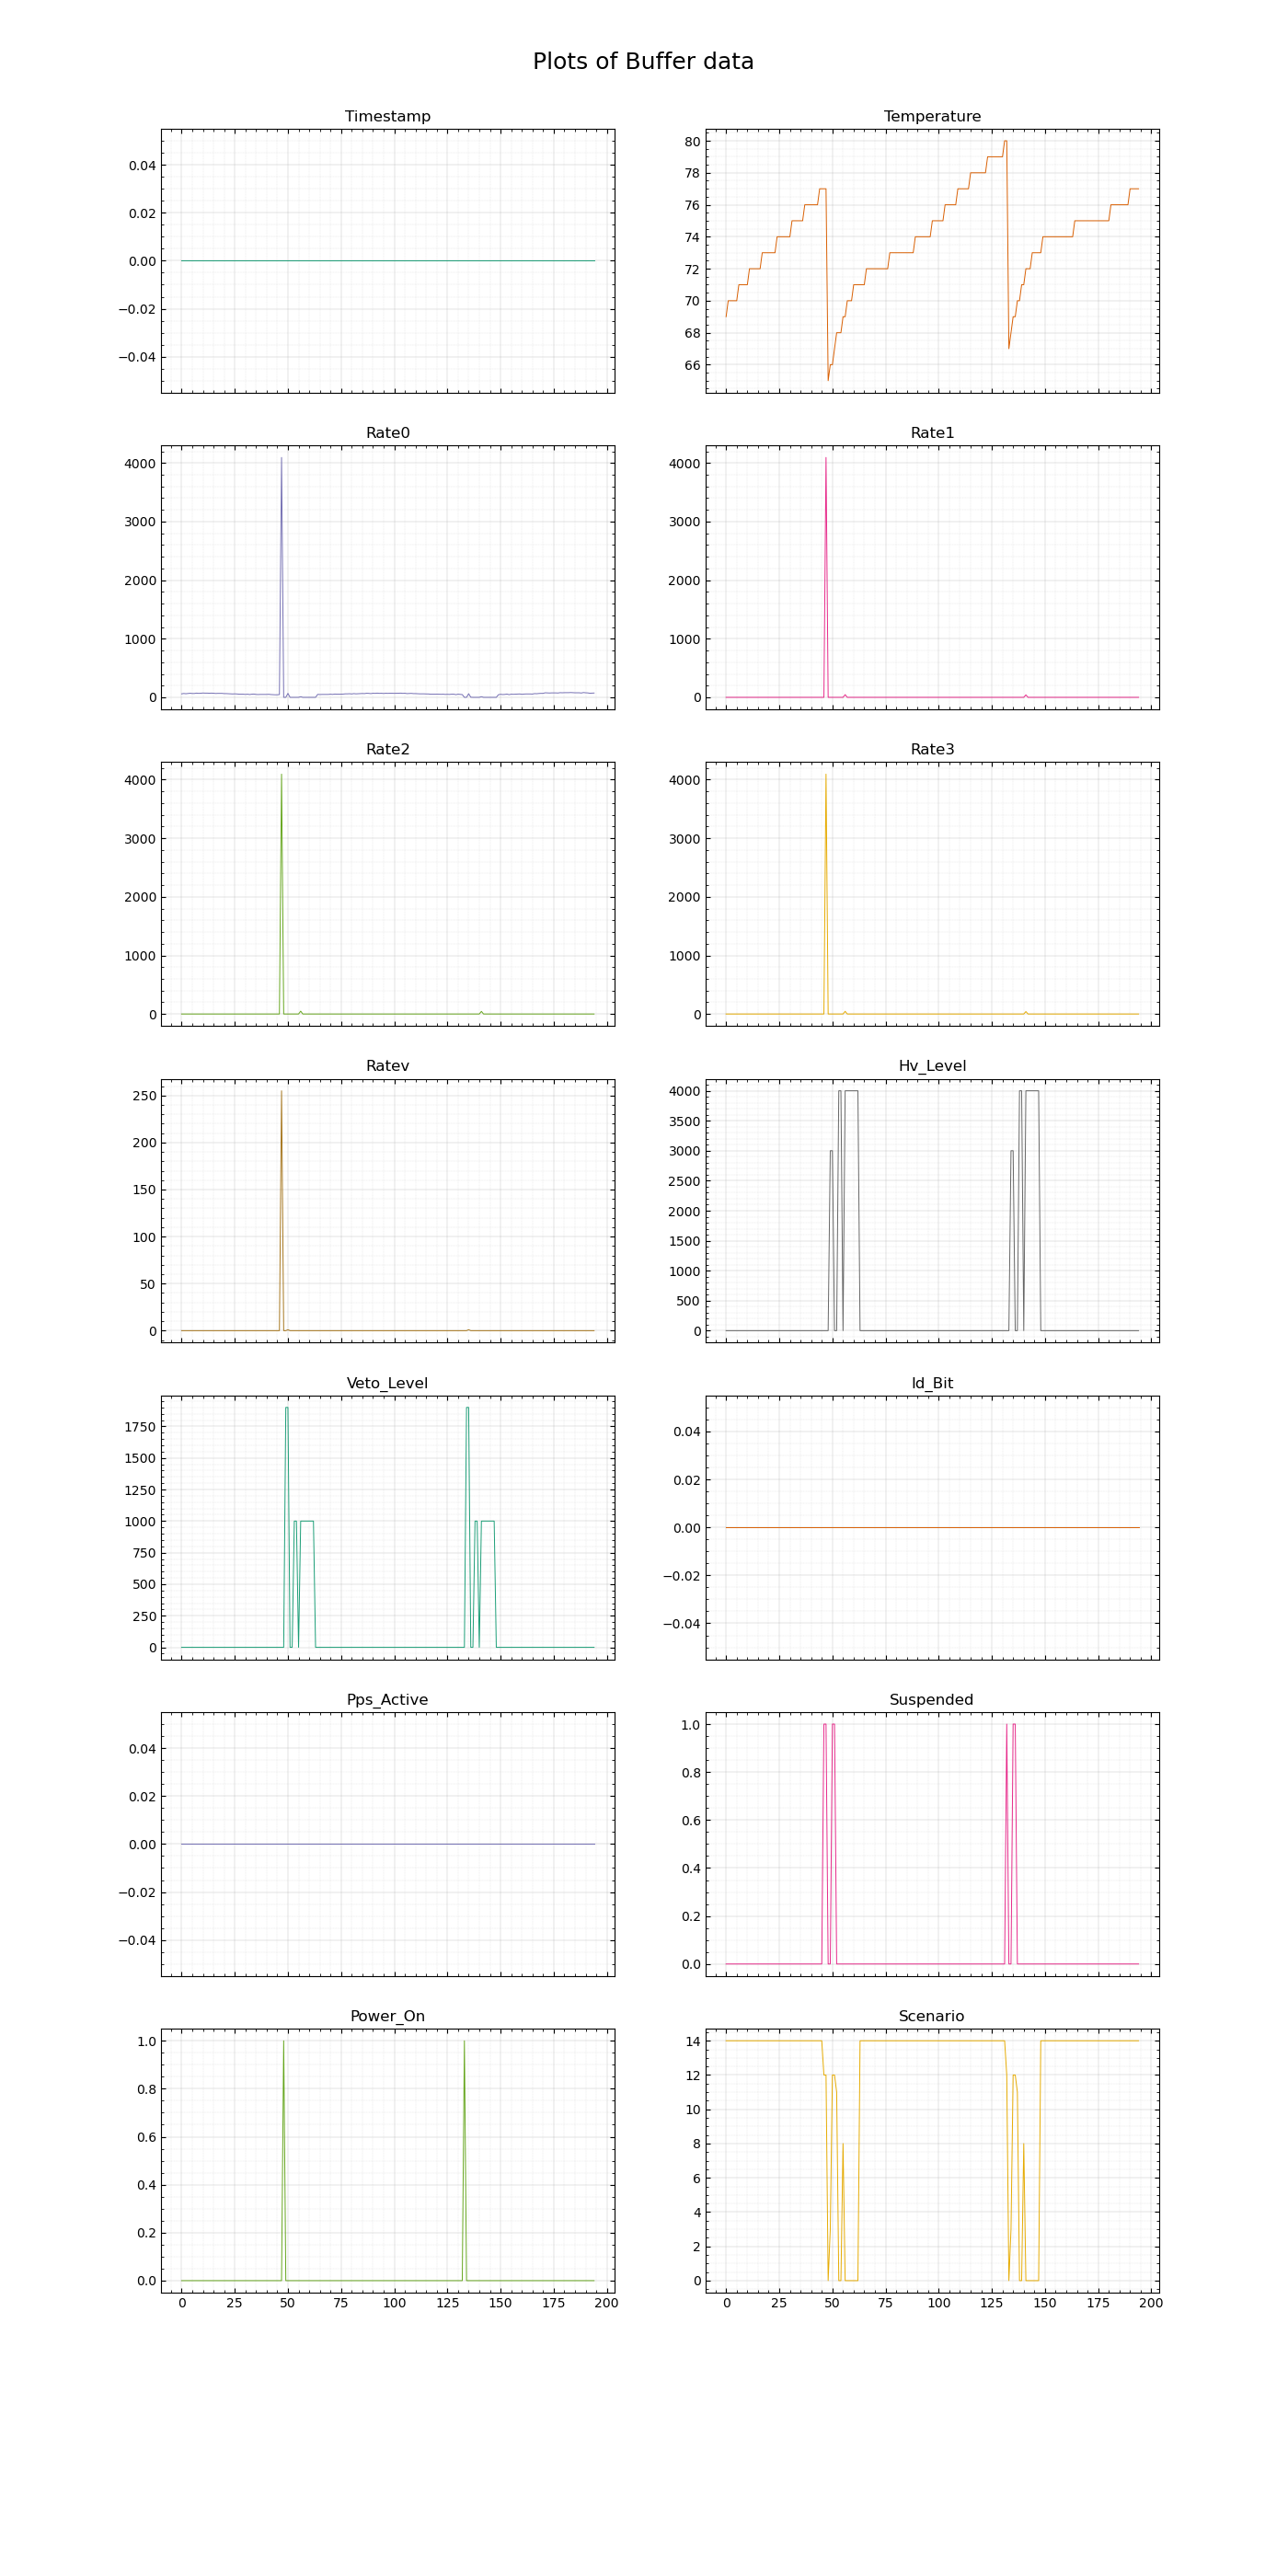

In [4]:
# Print the SiPM Data
fig, axes = rp.plot_buffer(data_SiPM)

# Veto Buffer Data

We collect both the PMT and SiPM data from the Veto buffers and then plot

In [17]:
# Directory of the buffer
buffer_fname    = raw_dir + 'SD-1015/' + 'light1-SD-1015-buff6.dat'

# Decode the buffer data in a dictionary
data_SiPM_v     = rp.get_dict(buffer_fname,struct=rp.VETO_STRUCT,MAX=None,STUPID=True)

# Directory of the buffer
buffer_fname    = raw_dir + 'SD-1015/' + 'light1-SD-1015-buff7.dat'

# Decode the buffer data in a dictionary
data_PMT_v      = rp.get_dict(buffer_fname,struct=rp.VETO_STRUCT,MAX=None,STUPID=True)

Line:   0%|          | 0/419 [00:00<?, ?it/s]

Line:   0%|          | 0/41 [00:00<?, ?it/s]

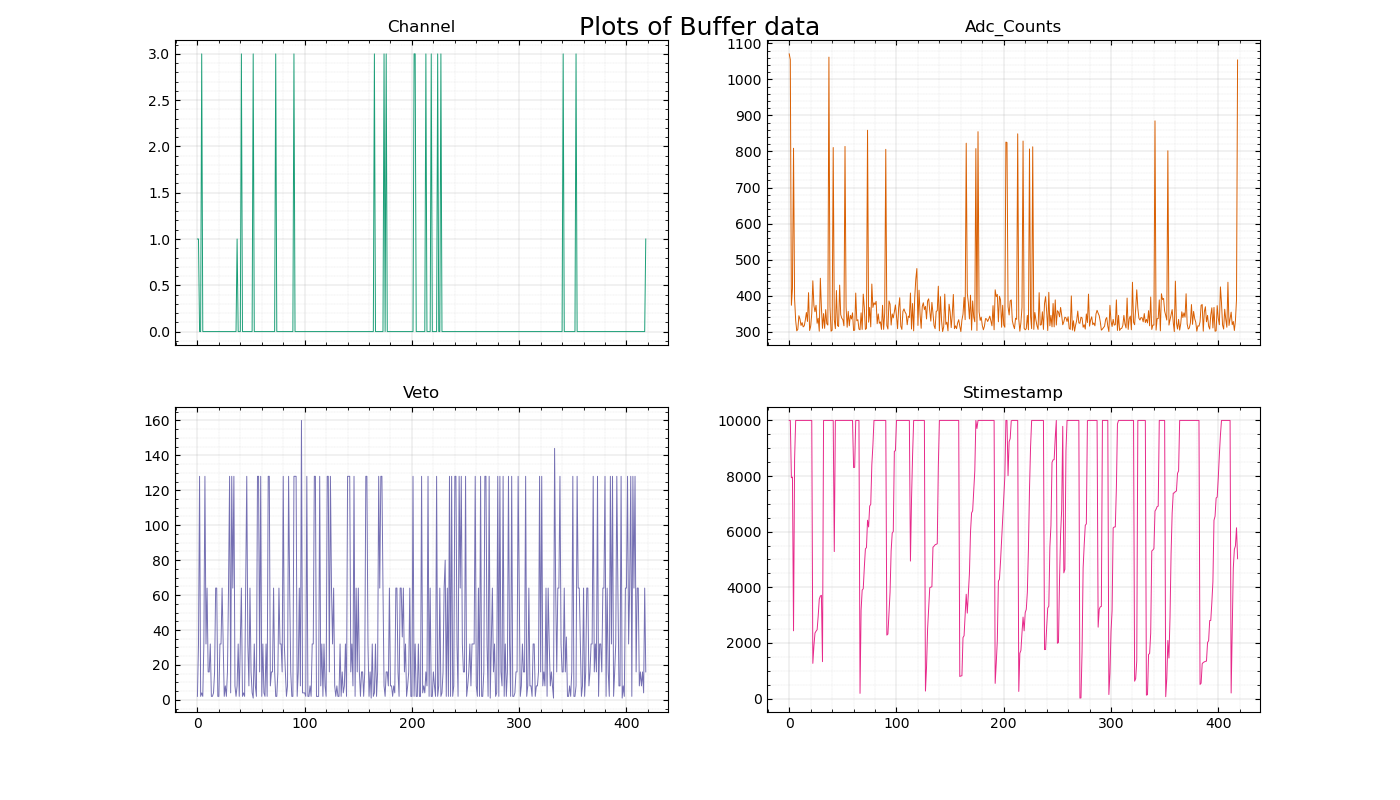

In [18]:
# Print the SiPM Data
fig, axes = rp.plot_buffer(data_SiPM_v)

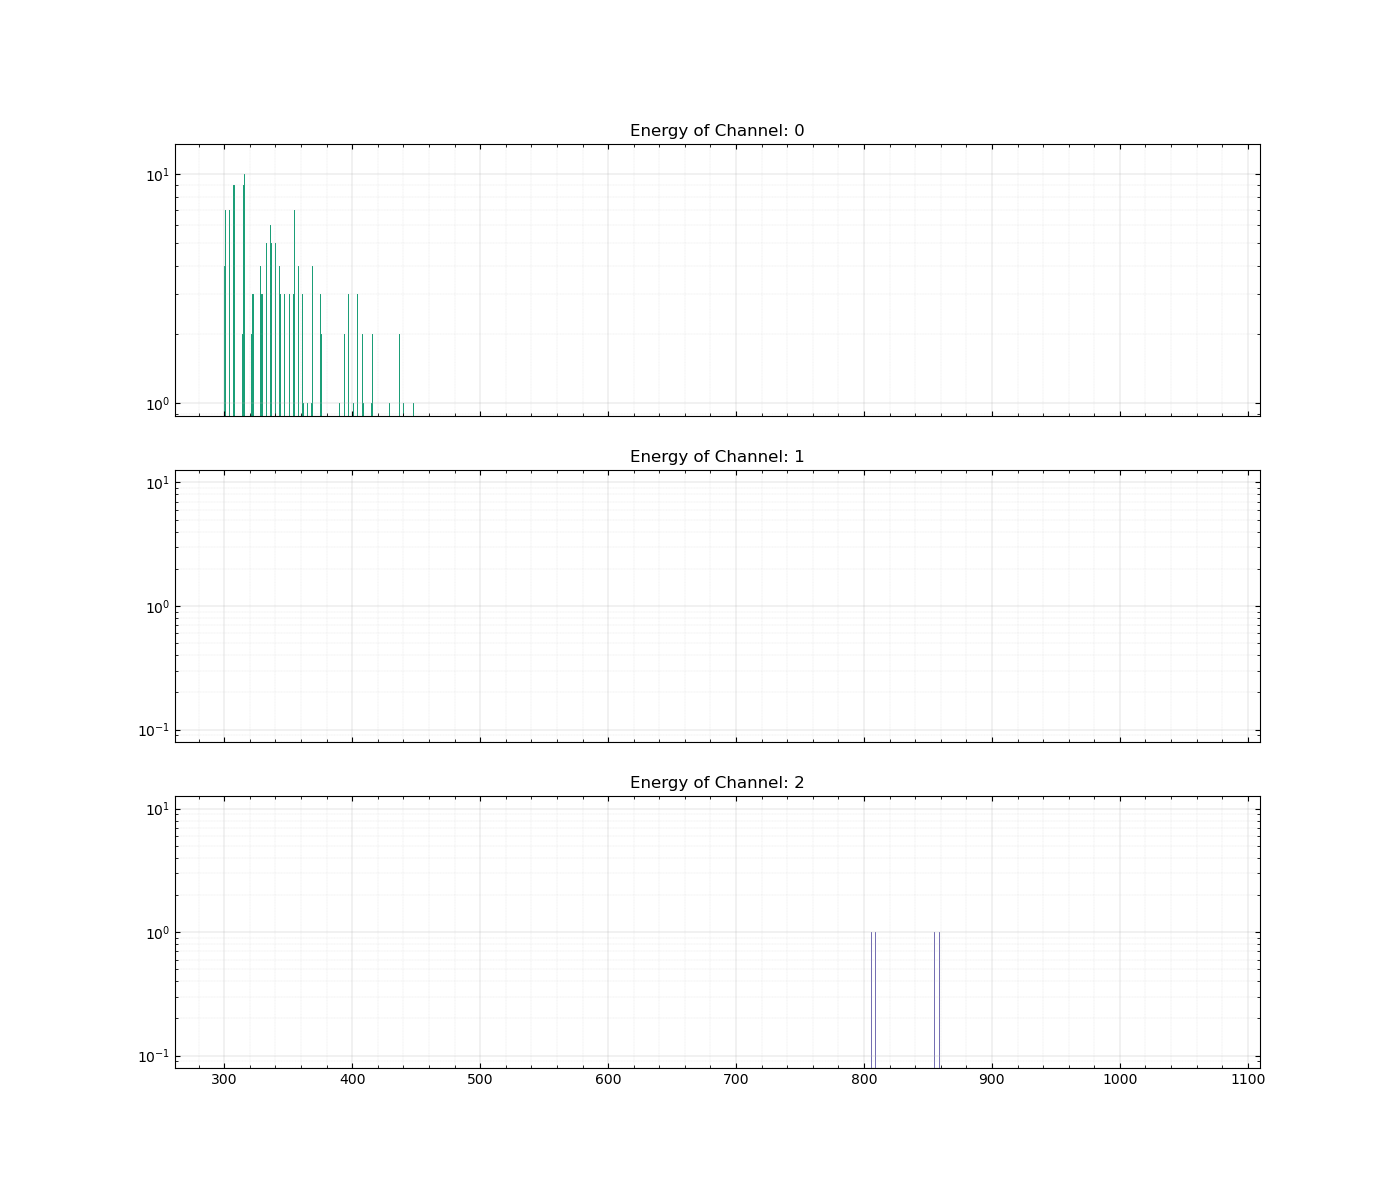

In [19]:
# Plot histograms
fig,ax = rp.plot_hists(data_SiPM_v,struct=rp.VETO_STRUCT)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (399,)

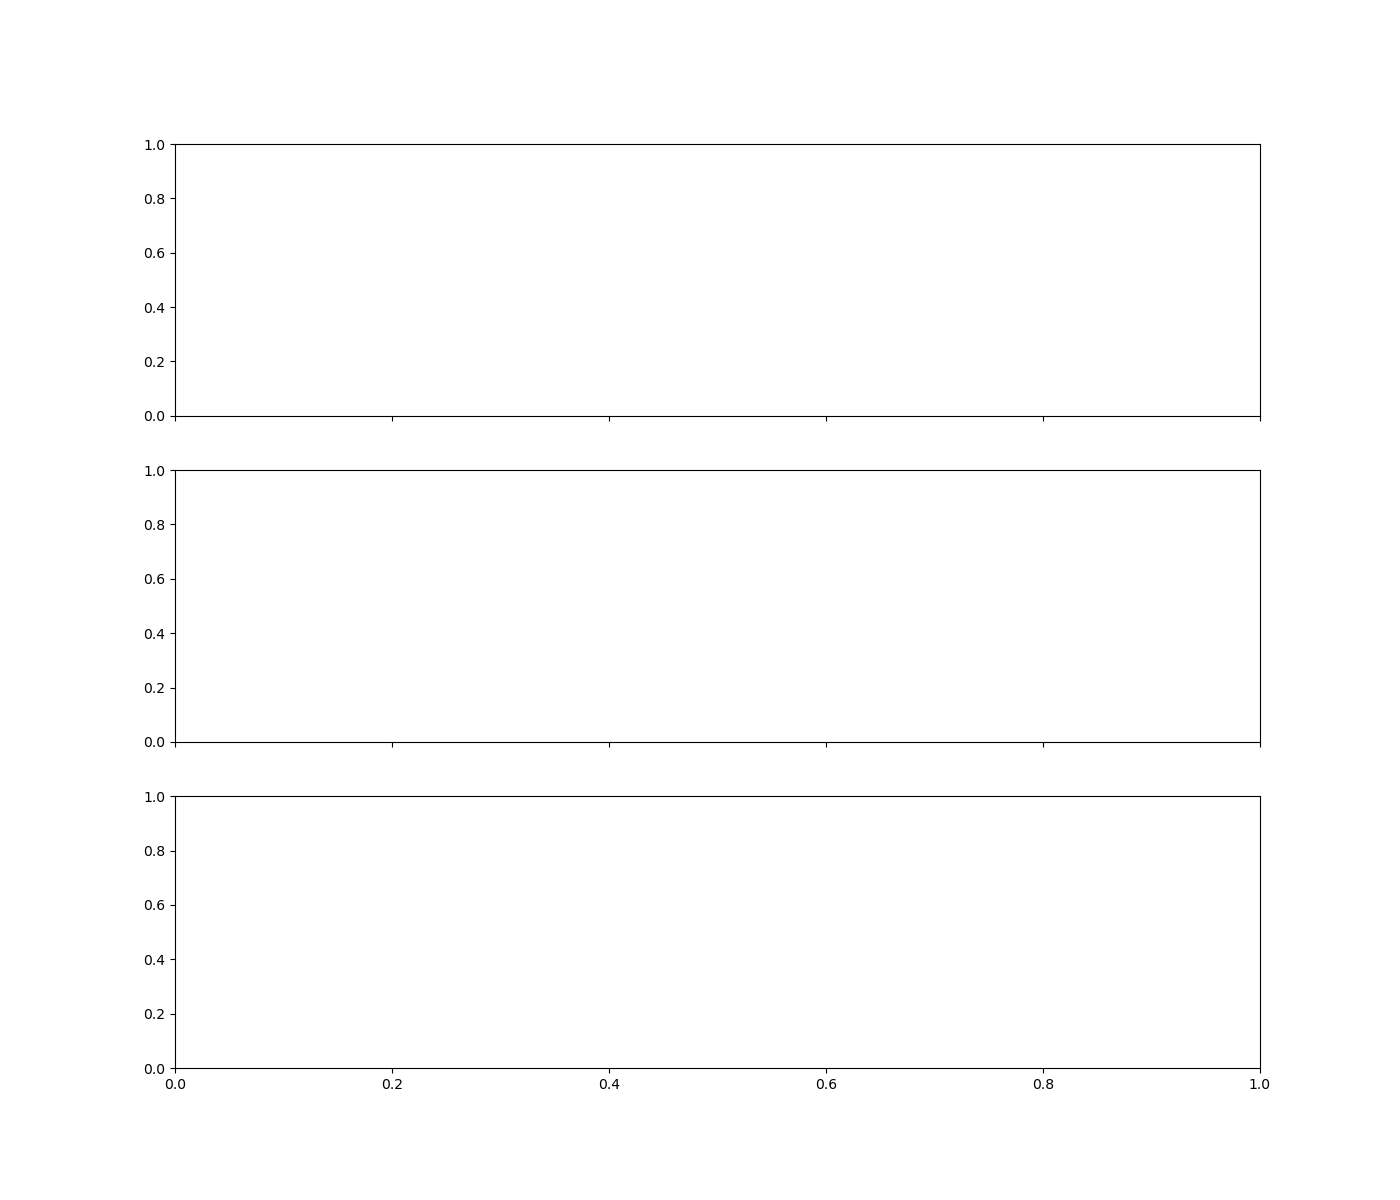

In [20]:
# Plot timestamps
fig,ax = rp.plot_timestamps(data_SiPM_v,RANGE=(0,1000),struct=rp.VETO_STRUCT)

ValueError: x and y must have same first dimension, but have shapes (2000,) and (0,)

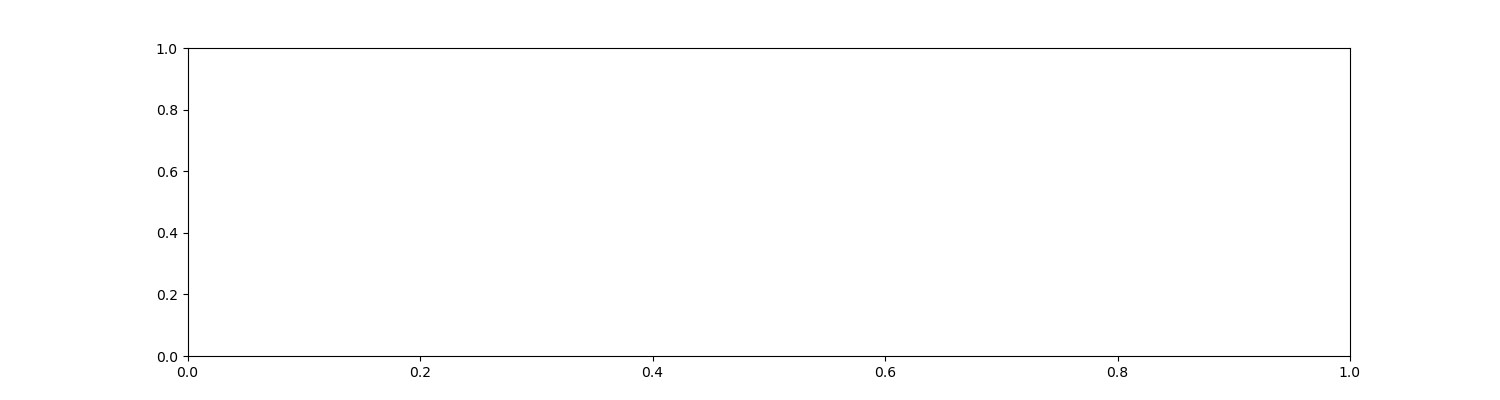

In [22]:
# Plot timestamps of all events
fig,ax = rp.plot_timestamp(data_SiPM_v,RANGE=(15000,17000))

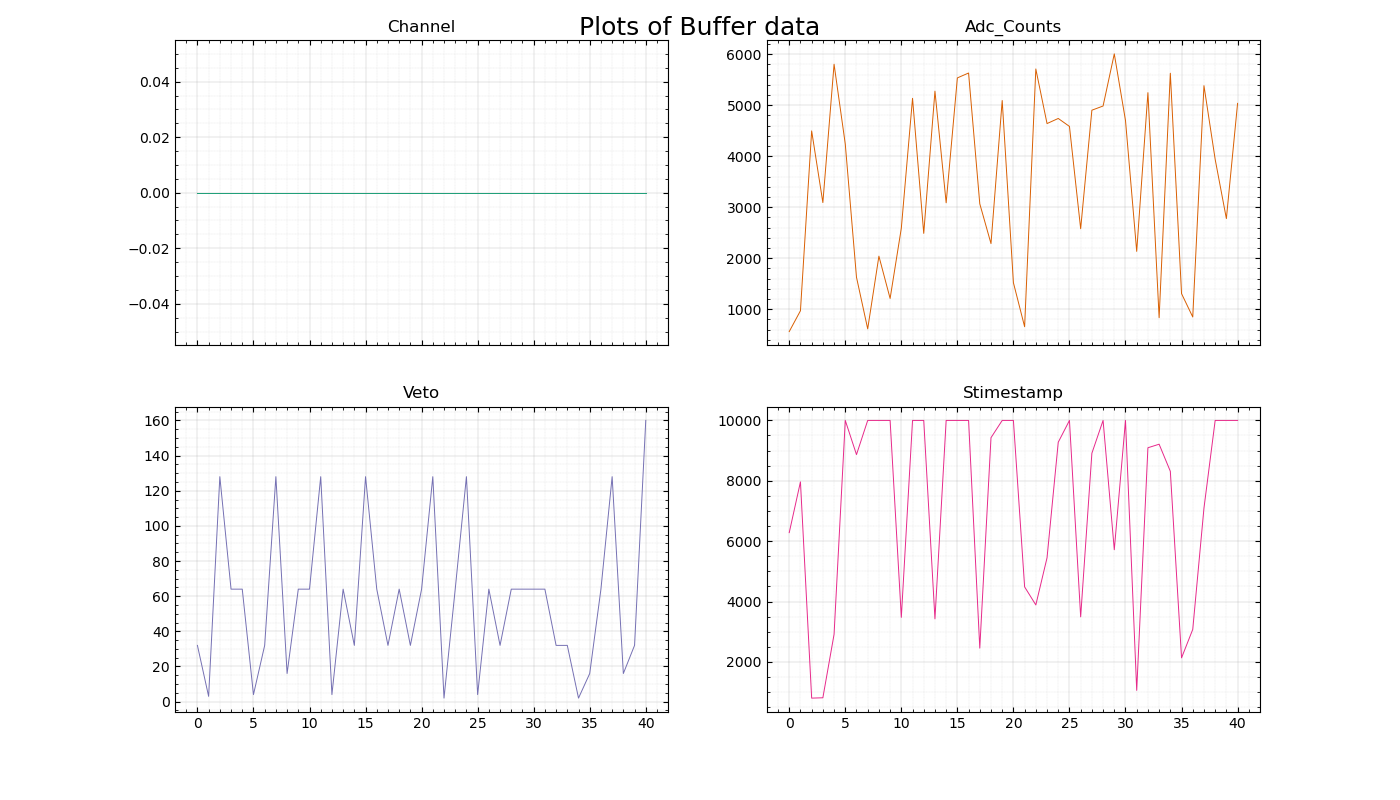

In [23]:
# Now print the PMT Data
fig, axes = rp.plot_buffer(data_PMT_v)

AttributeError: 'AxesSubplot' object has no attribute 'flatten'

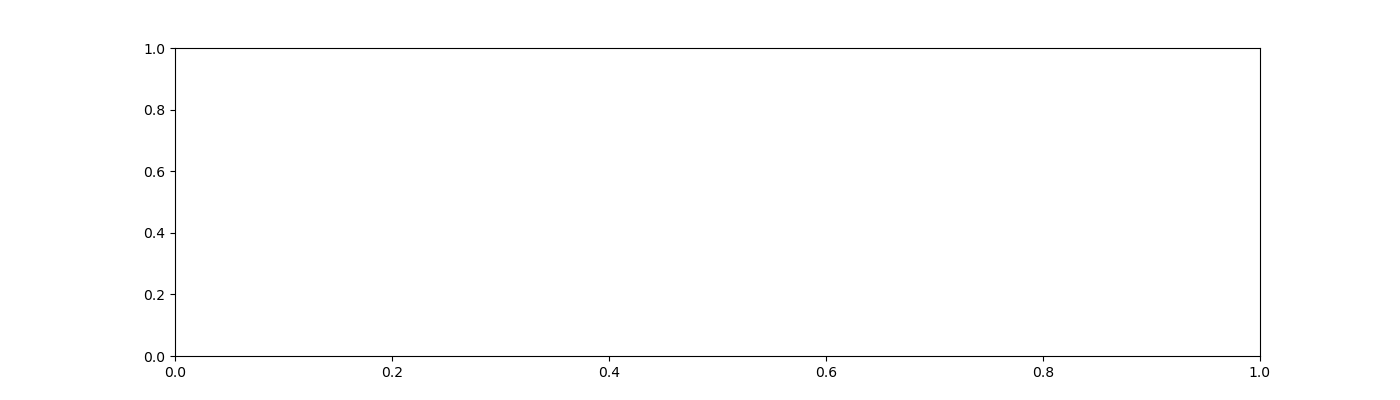

In [24]:
# Plot histograms
fig,ax = rp.plot_hists(data_PMT_v,struct=rp.VETO_STRUCT)

AttributeError: 'AxesSubplot' object has no attribute 'flatten'

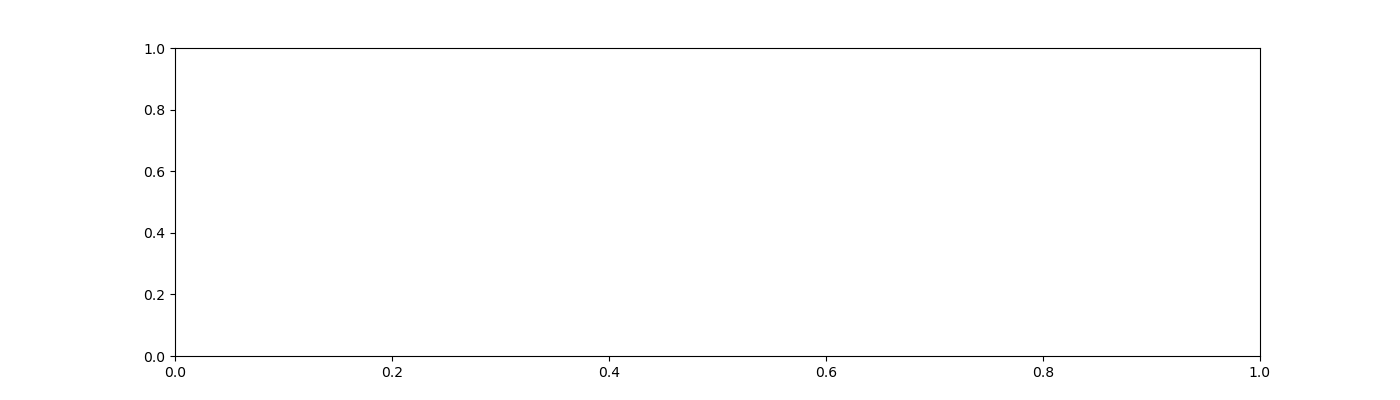

In [25]:
# Plot timestamps
fig,ax = rp.plot_timestamps(data_PMT_v,RANGE=(0,1000),struct=rp.VETO_STRUCT)

ValueError: x and y must have same first dimension, but have shapes (1500,) and (41,)

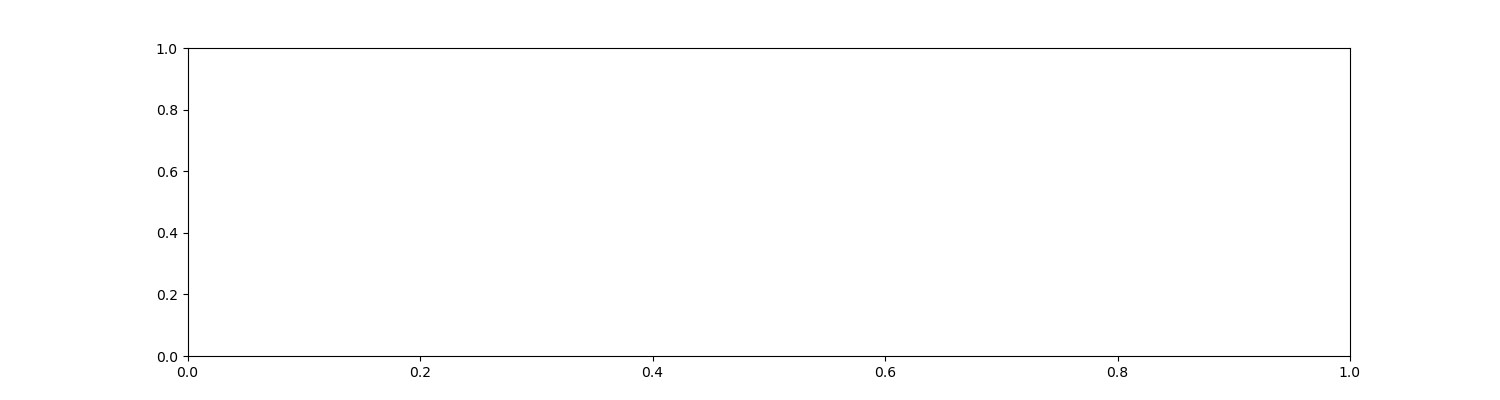

In [26]:
# Plot timestamps of all events
fig,ax = rp.plot_timestamp(data_PMT_v,RANGE=(0,1500))

# Non Veto Buffer Data

We collect both the PMT and SiPM data from the NON Veto buffers and then plot

In [16]:
# Directory of the buffer
buffer_fname    = raw_dir + 'SD-1015/' + 'light1-SD-1015-buff4.dat'

# Decode the buffer data in a dictionary
data_SiPM_nv    = rp.get_dict(buffer_fname,struct=rp.NONVETO_STRUCT,MAX=100000,STUPID=True)

# Directory of the buffer
buffer_fname    = raw_dir + 'SD-1015/' + 'light1-SD-1015-buff5.dat'

# Decode the buffer data in a dictionary
data_PMT_nv     = rp.get_dict(buffer_fname,struct=rp.NONVETO_STRUCT,MAX=100000,STUPID=True)

Line:   0%|          | 0/100000 [00:00<?, ?it/s]

Line:   0%|          | 0/100000 [00:00<?, ?it/s]

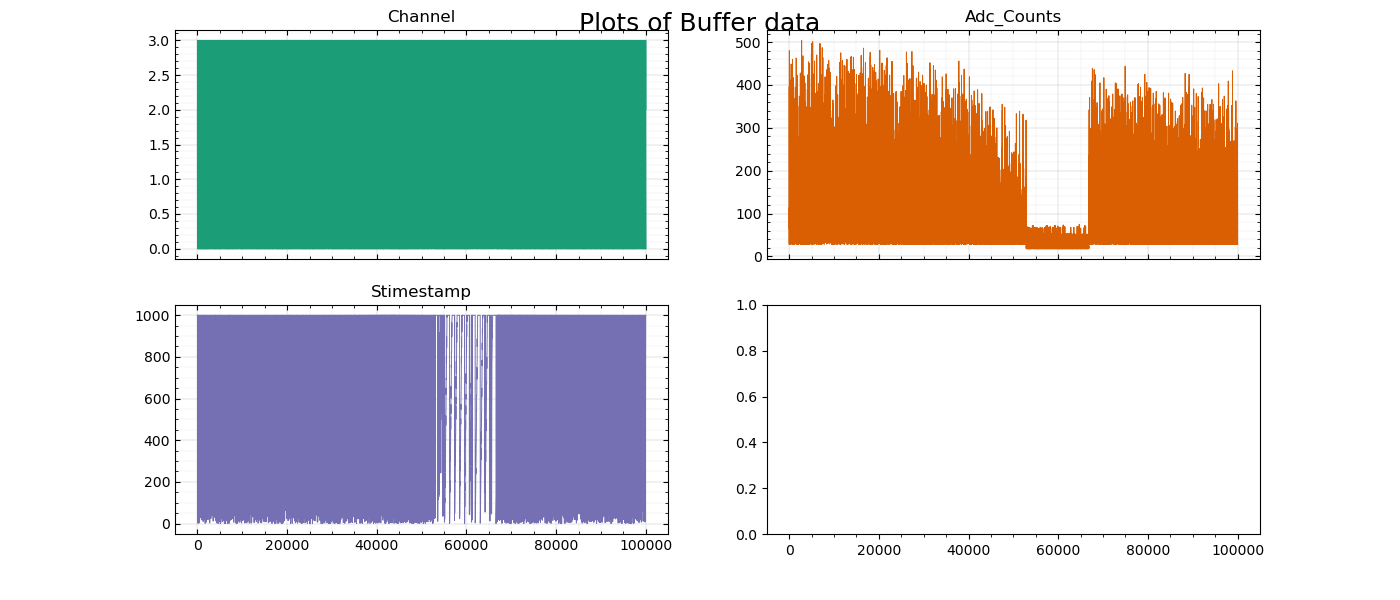

In [27]:
# Print the SiPM Data
fig, axes = rp.plot_buffer(data_SiPM_nv)

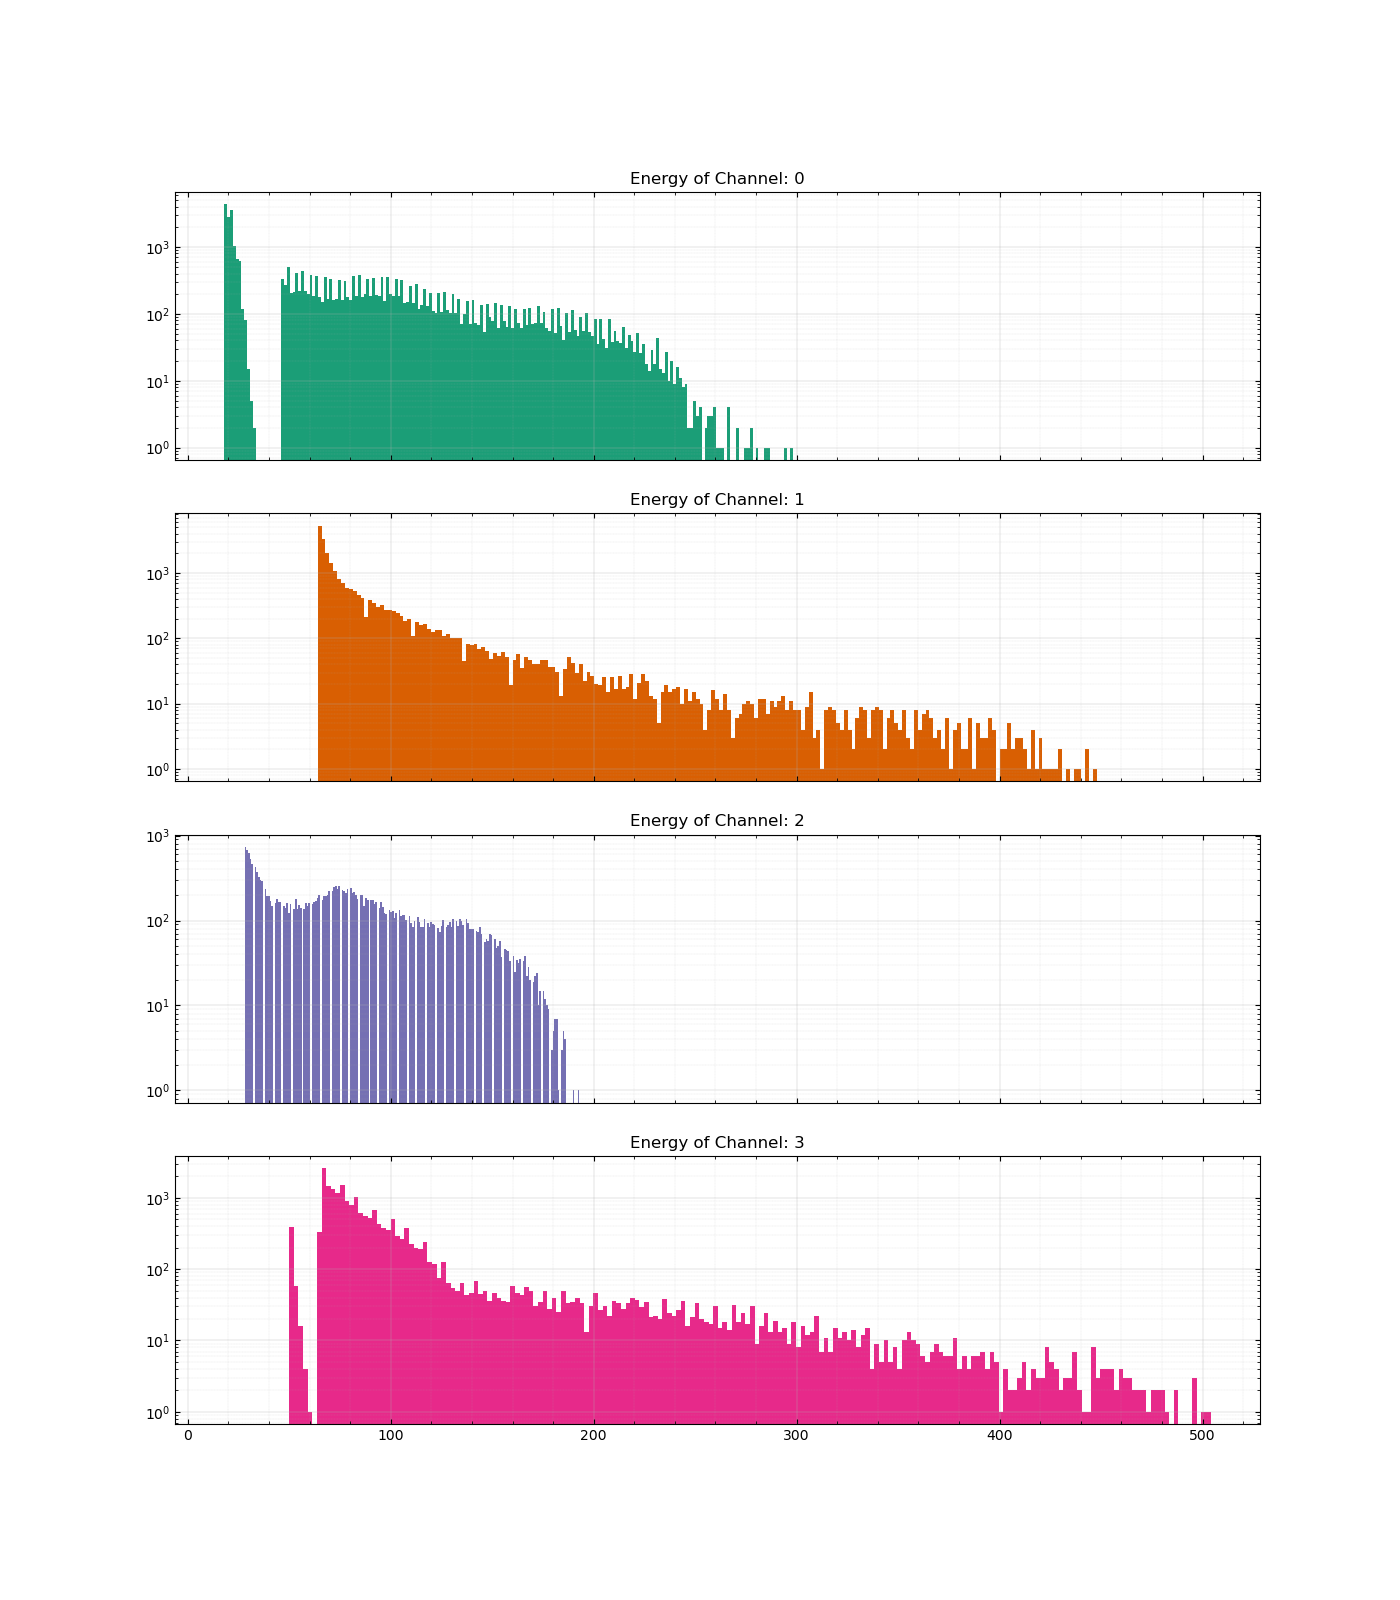

In [28]:
# Plot histograms
fig,ax = rp.plot_hists(data_SiPM_nv,struct=rp.NONVETO_STRUCT,bins=200)

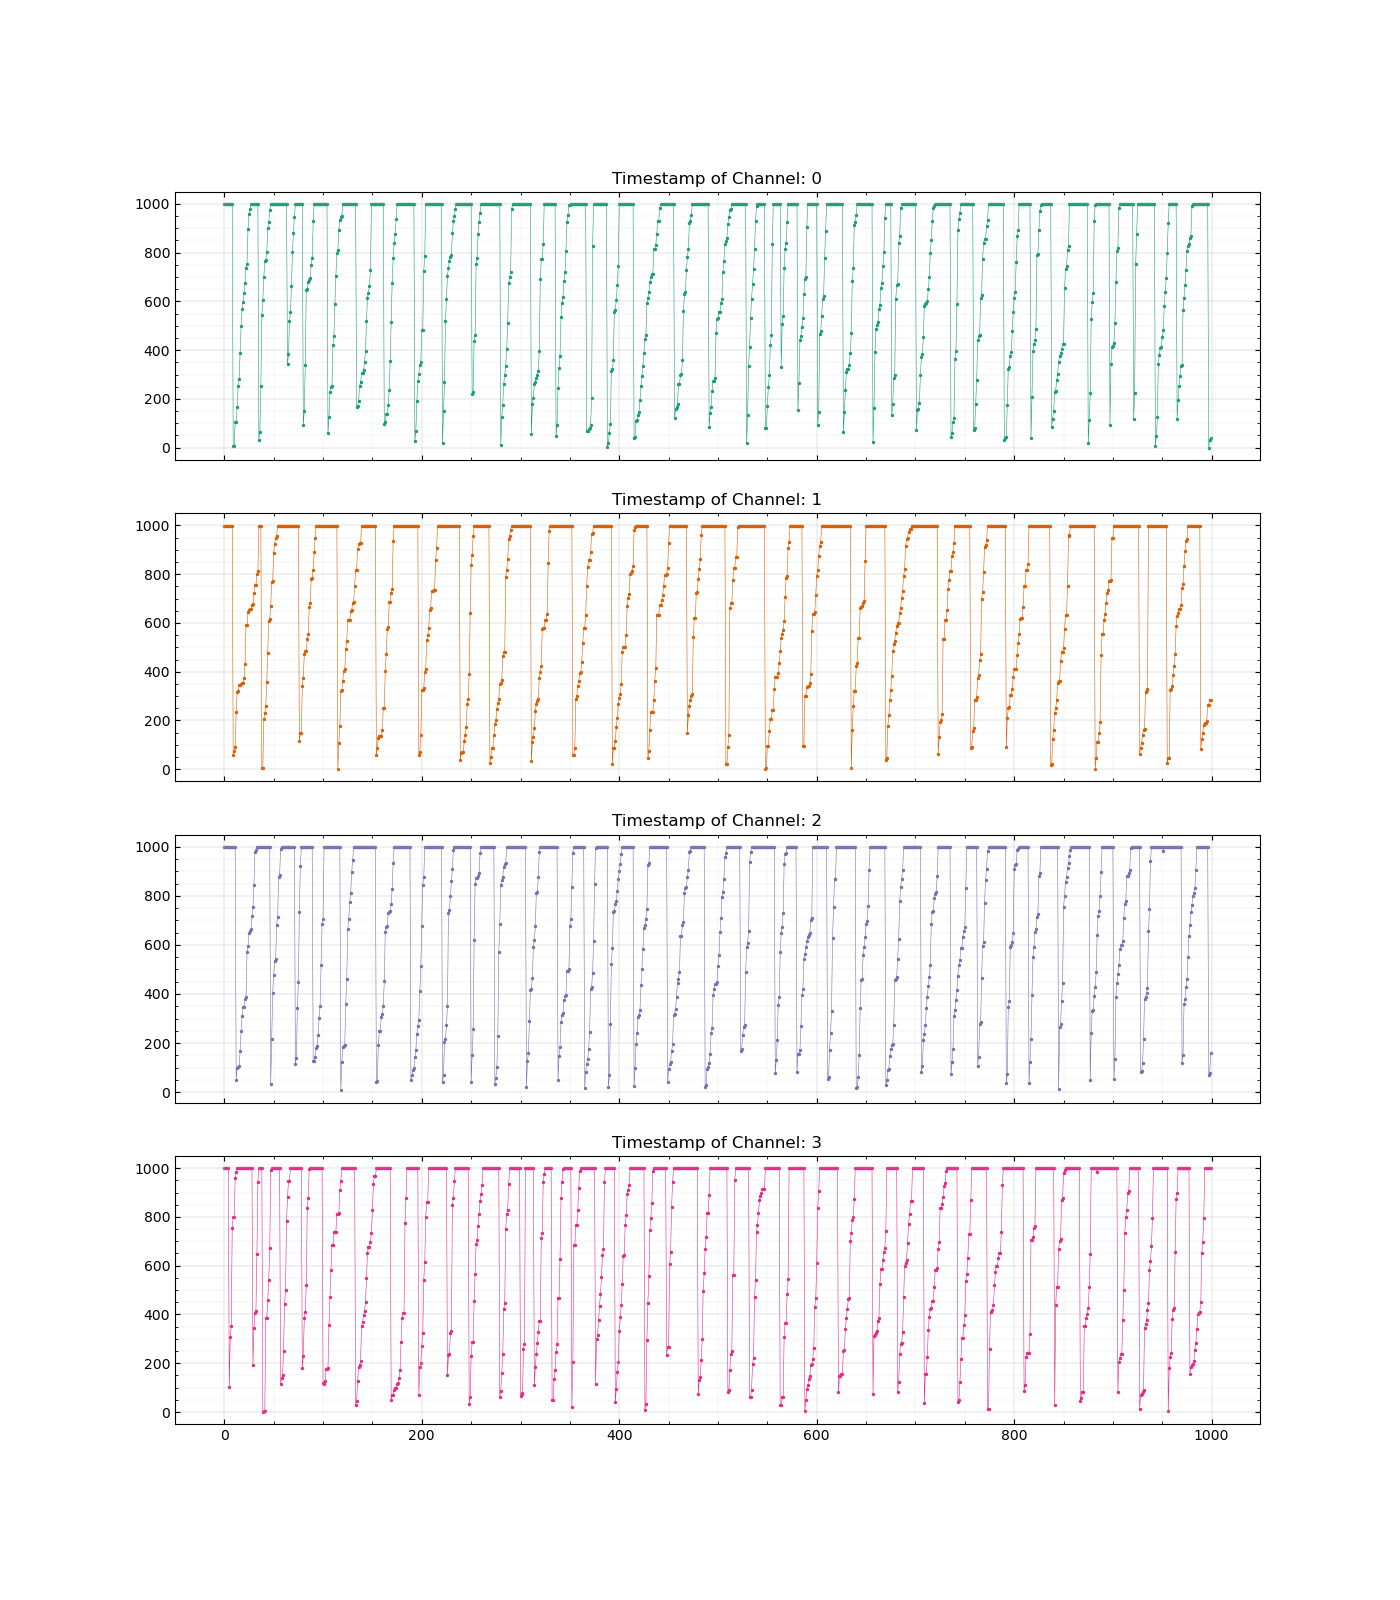

In [29]:
# Plot timestamps
fig,ax = rp.plot_timestamps(data_SiPM_nv,RANGE=(0,1000),struct=rp.NONVETO_STRUCT)

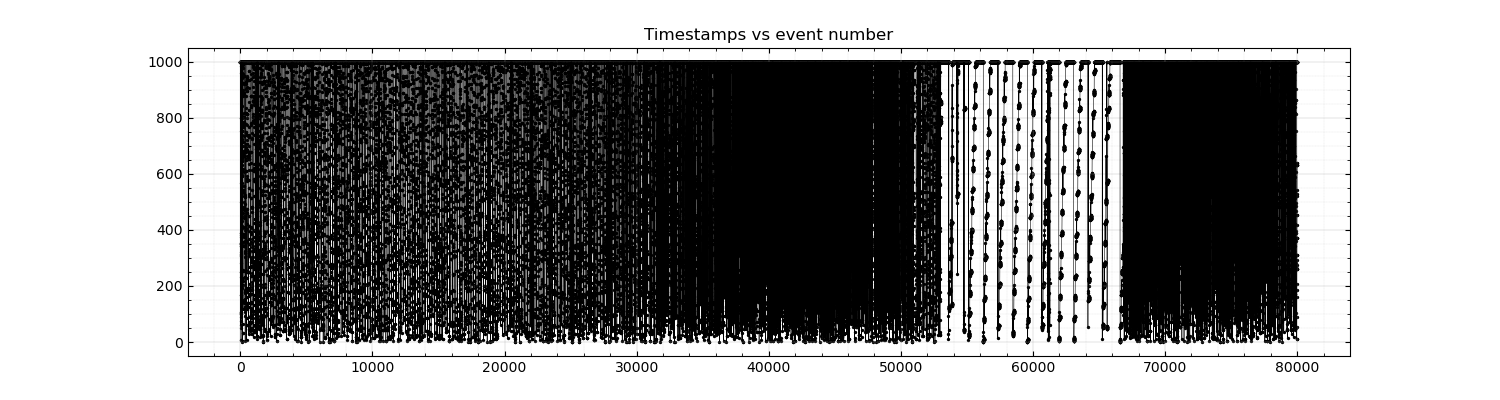

In [43]:
# Plot timestamps of all events
fig, ax = rp.plot_timestamp(data_SiPM_nv,RANGE=(0,80000))

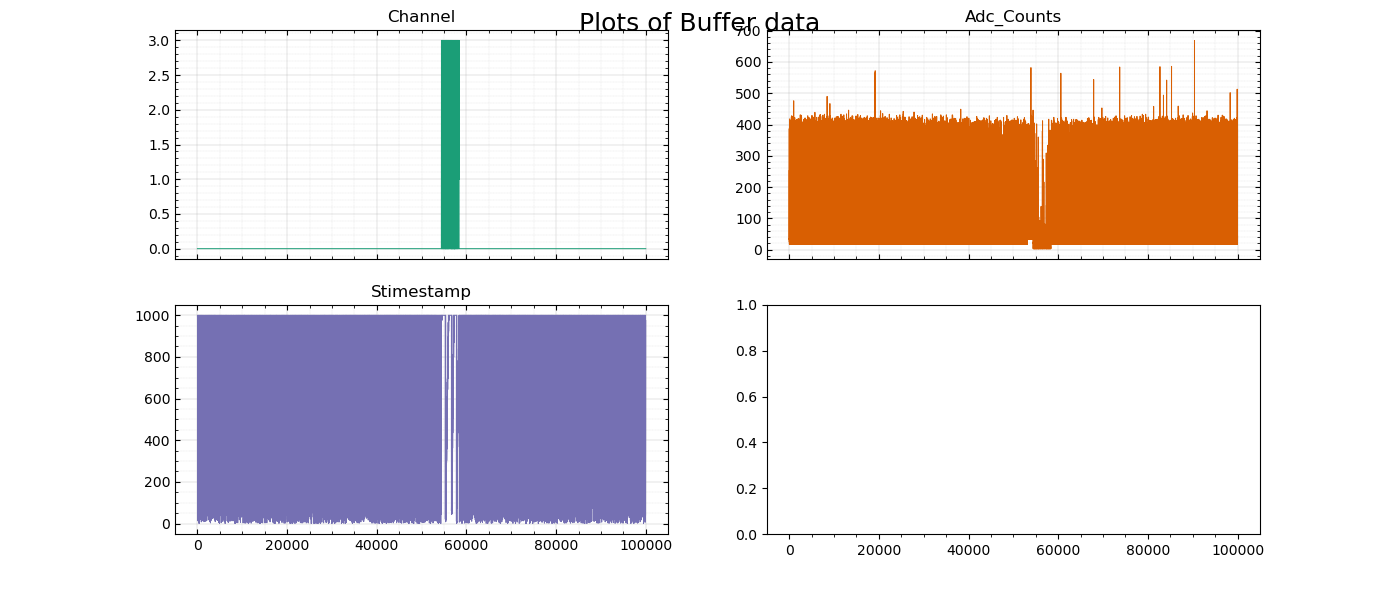

In [32]:
# Now print the PMT Data
fig, axes = rp.plot_buffer(data_PMT_nv)

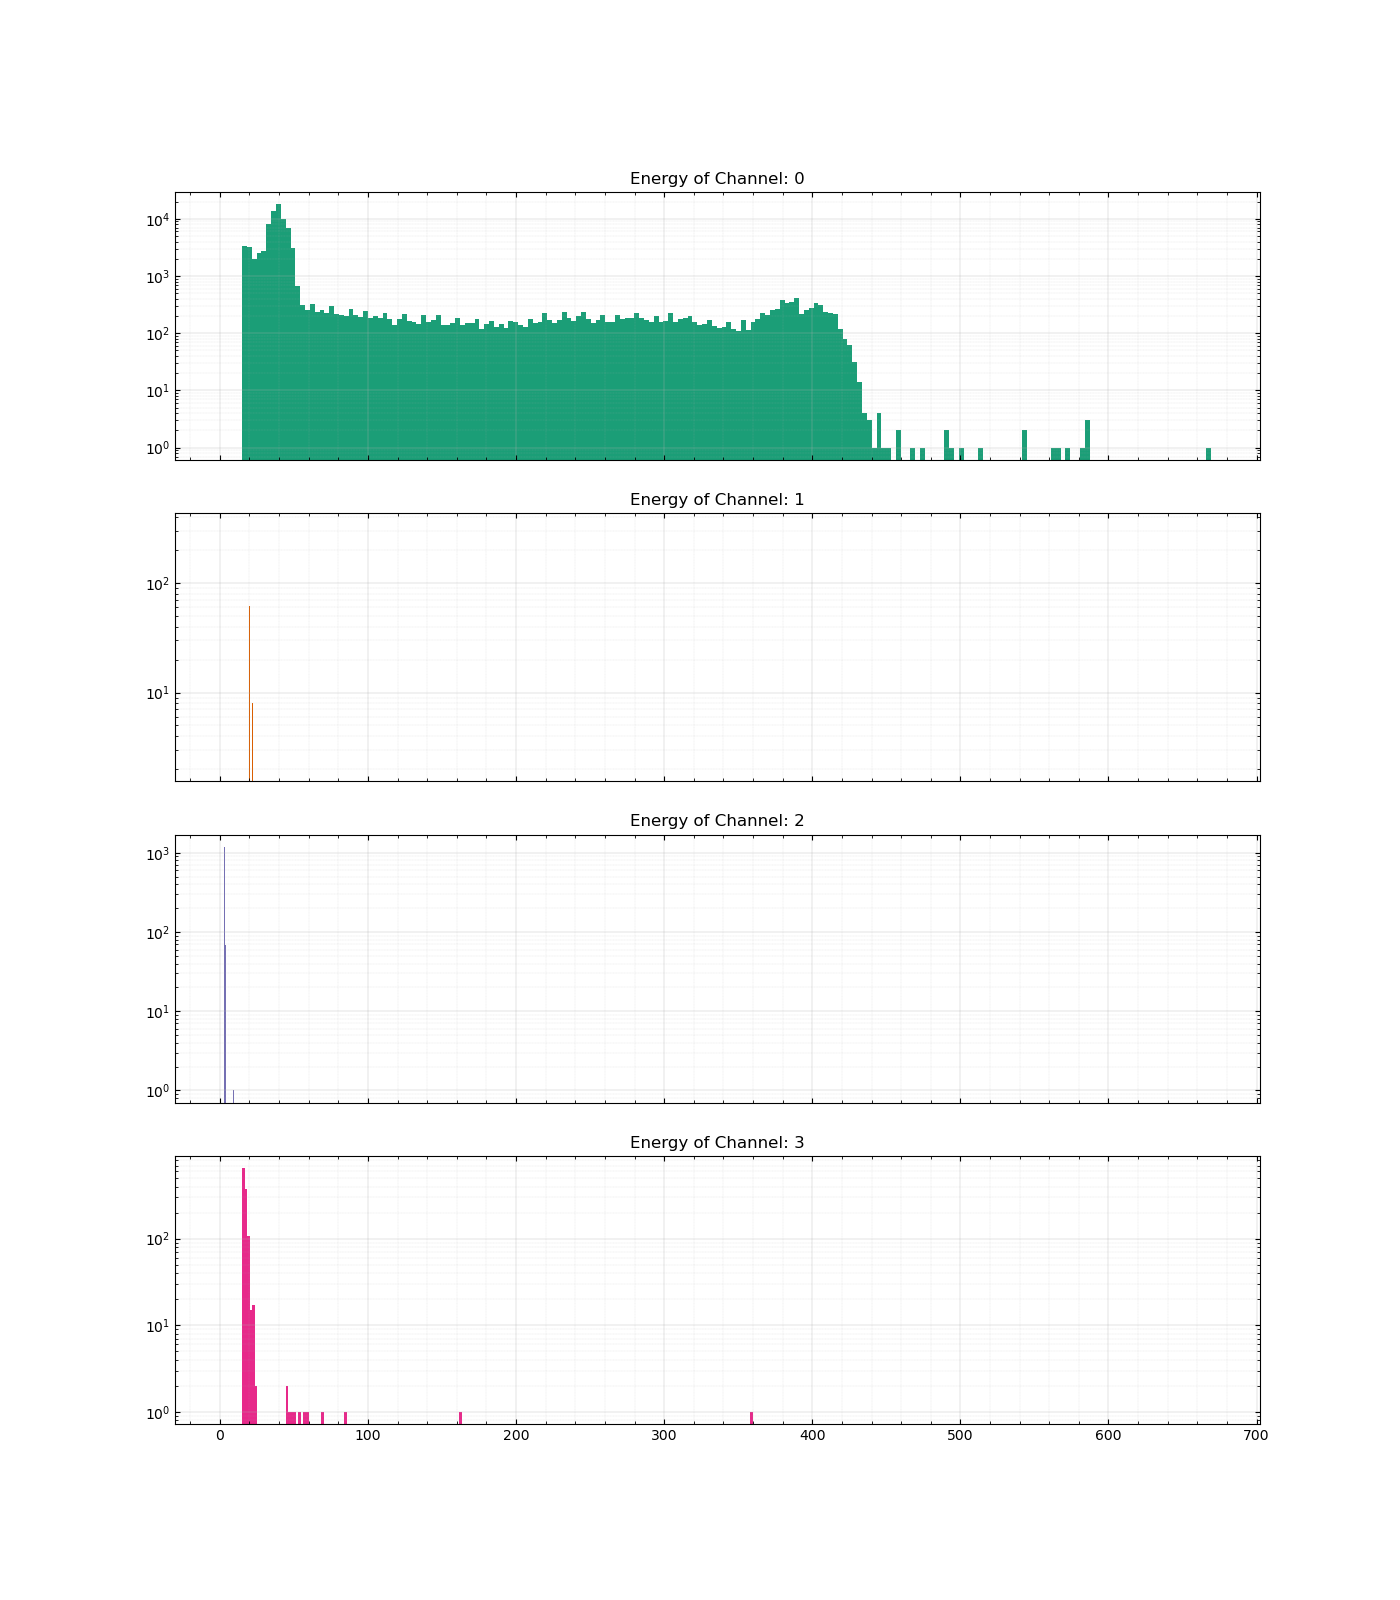

In [33]:
# Plot histograms
fig,ax = rp.plot_hists(data_PMT_nv,struct=rp.NONVETO_STRUCT,bins=200)

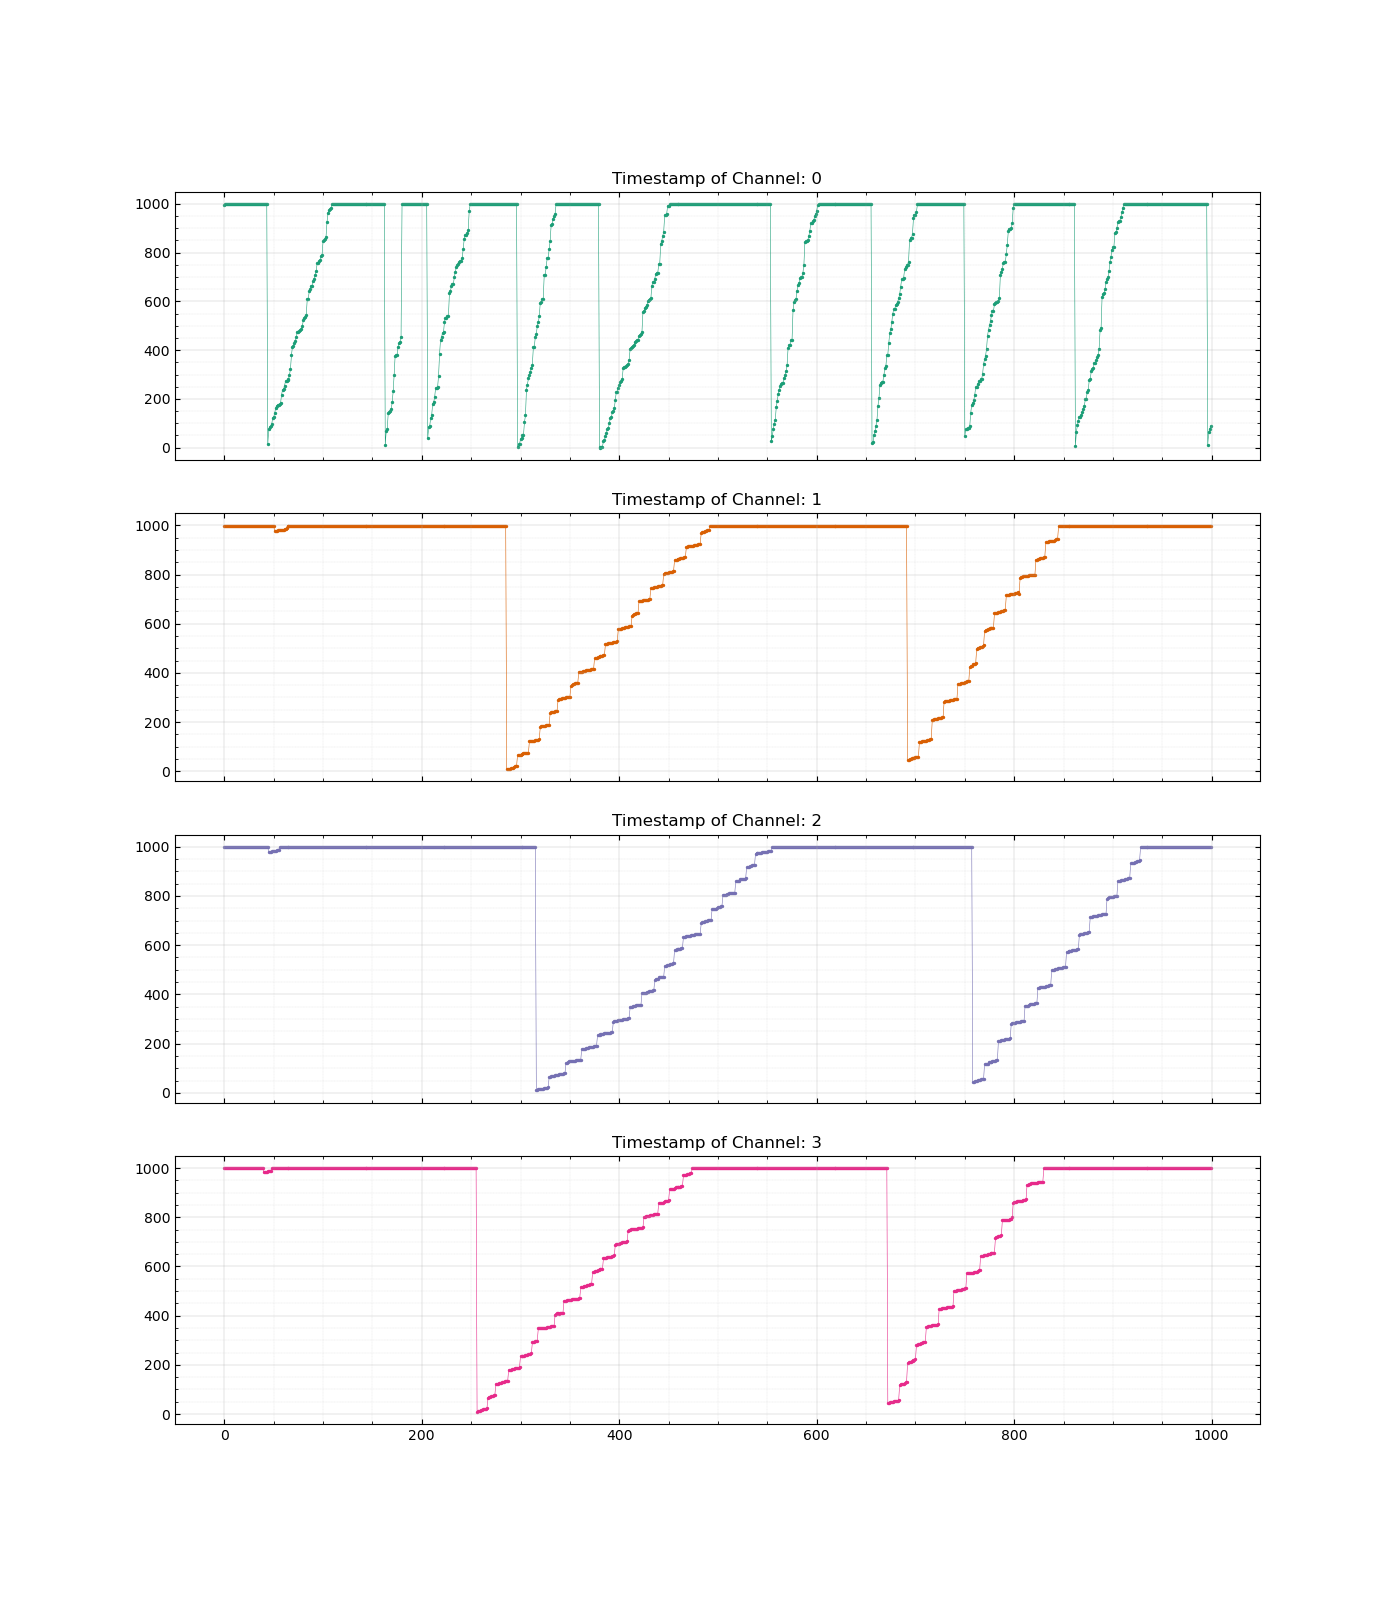

In [34]:
# Plot timestamps
fig,ax = rp.plot_timestamps(data_PMT_nv,RANGE=(0,1000),struct=rp.NONVETO_STRUCT)

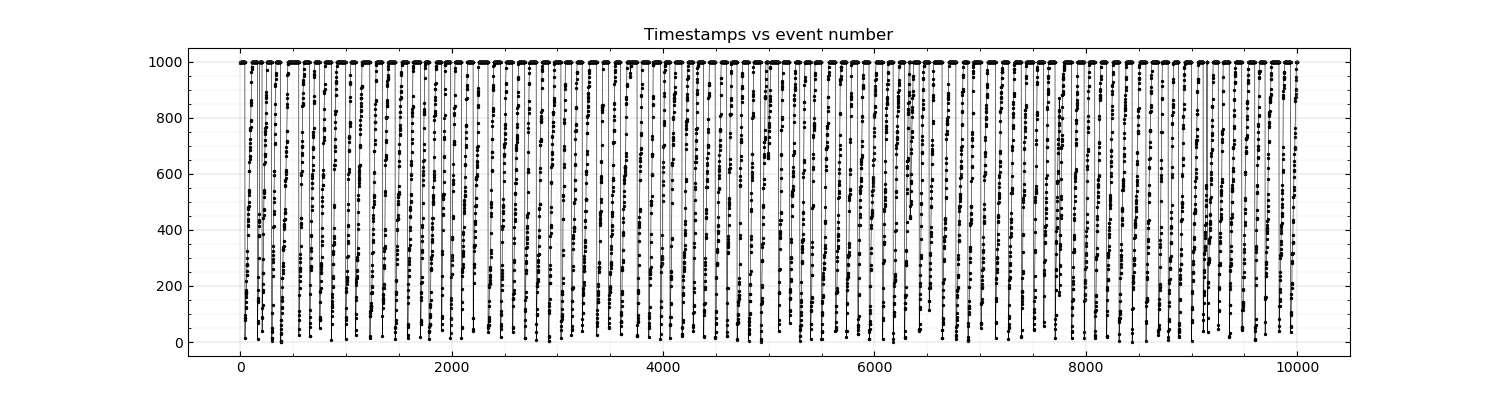

In [42]:
# Plot timestamps of all events
fig, ax = rp.plot_timestamp(data_PMT_nv,RANGE=(0,10000))